**House Prices Linear Regression Project**

This project focuses on a regression task within the field of supervised learning. The task of this project is to predict house prices using various features such as the number of bedrooms, bathrooms, square footage, location, and other relevant attributes. The output is a continuous value, representing the house price, which makes it a regression problem rather than a classification problem.


The primary goal of this project is to develop a machine learning model that can accurately predict house prices based on a set of input features. This model can be useful for real estate professionals, homebuyers, and sellers to estimate the value of a property without professional knowledge.

By using linear regression, we aim to establish a relationship between the input features and the target variable (house price) by fitting a linear equation to the observed data. This equation can then be used to predict house prices for new, unseen data points.

The data for this project is sourced from a public dataset known as "House Prices", This dataset is available on Kaggle.

The dataset contains information on various aspects of residential homes in Ames, Iowa, including:

Sales price (the target variable), Various numerical features such as the number of bedrooms, bathrooms, overall quality, and total square footage.
Categorical features such as the type of heating system, garage type, and exterior material.

The data was gathered through a combination of public records and surveys. It includes information on houses that were sold between 2006 and 2010. The dataset is comprehensive, with over 1,400 observations and 80+ features, providing a rich source of information for training and testing the linear regression model.

In summary, this project involves developing a linear regression model to predict house prices using a dataset sourced from Kaggle. The goal is to create a tool that can accurately estimate house prices based on various input features, which can be useful for various stakeholders in the real estate industry.




In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

**Data Loading and Cleaning**

The "House Prices" dataset from Kaggle. This dataset includes various features about houses sold in Ames, Iowa, and their corresponding prices. Gather the dataset containing house prices and related features.
Clean the data by handling missing values, removing duplicates, and correcting any errors.

Data cleaning steps:
1. Check for missing values
2. Fill numeric missing values with the median and drop columns with too many missing values
3. For categorical columns, fill missing values with the mode
4. Drop columns with non-essential features (e.g., ID)
5. Check for any remaining missing values
6. visualize the data summary




In [ ]:
# Load the dataset
file_path = '/content/train.csv'
df = pd.read_csv('/content/train.csv')

# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill or drop missing values
# fill numeric missing values with the median and drop columns with too many missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop columns with non-essential features (e.g., ID)
df.drop(columns=['Id'], inplace=True)

# Check for any remaining missing values
print(df.isnull().sum().sum())  # Should be 0

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

<ipython-input-15-94262d62d8ba>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


**Exploratory Data Analysis (EDA)**

How:

Data Exploration:
Use statistical summaries and visualizations to understand the distribution, range, and central tendency of each variable.
Identify and analyze any missing values or outliers that may affect the analysis.

Analysis:
Analyze each variable individually to understand its distribution and characteristics.
Use box plots, and other visualizations to identify patterns and anomalies.

Study the relationship between pairs of variables using scatter plots, correlation coefficients, and other statistical measures.
Identify any linear or non-linear relationships between variables.


Why:

Understand the Data: EDA helps to gain a comprehensive understanding of the dataset, including its structure, range, and distribution of values.

Identify Patterns and Relationships.


Detect Anomalies and Missing Values.


Improve Model Accuracy: By understanding the data and its relationships, analysts can make more informed decisions about which variables to include in the regression model, leading to improved accuracy and performance.
Analysis and Conclusions/Discussions


Correlation Matrix with Analysis

Square footage has a high positive correlation with house prices.
The number of bedrooms also has a positive correlation, but it may be weaker than the correlation with square footage.
The age of the house may have a negative correlation with prices, indicating that older homes are generally less valuable.

In conclusion, EDA is a crucial step in the "House-Prices" linear regression project. It helps analysts to understand the dataset, identify patterns and relationships between variables, and detect any anomalies or missing values that may affect the regression analysis. By performing EDA, analysts can make more informed decisions about which variables to include in the regression model and how to handle any issues with the data, leading to improved accuracy and performance of the model.

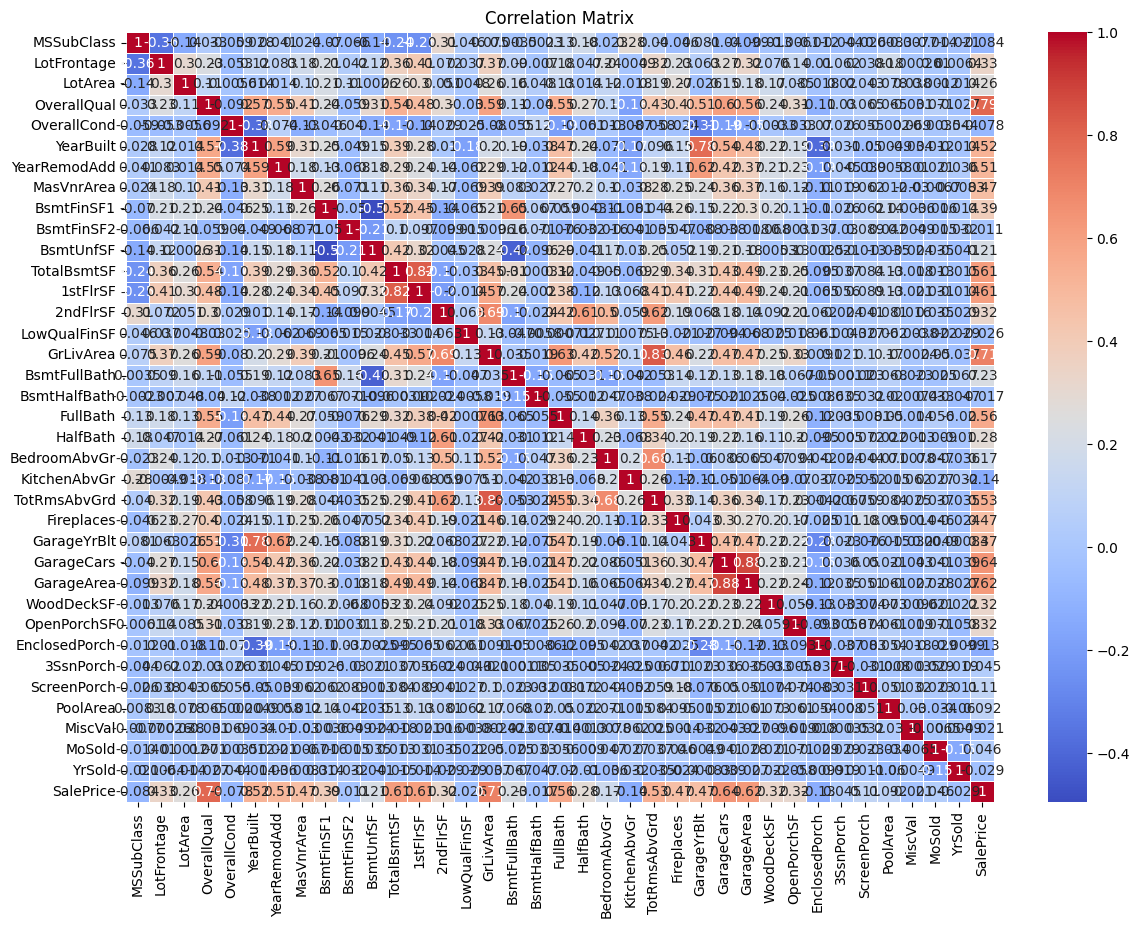

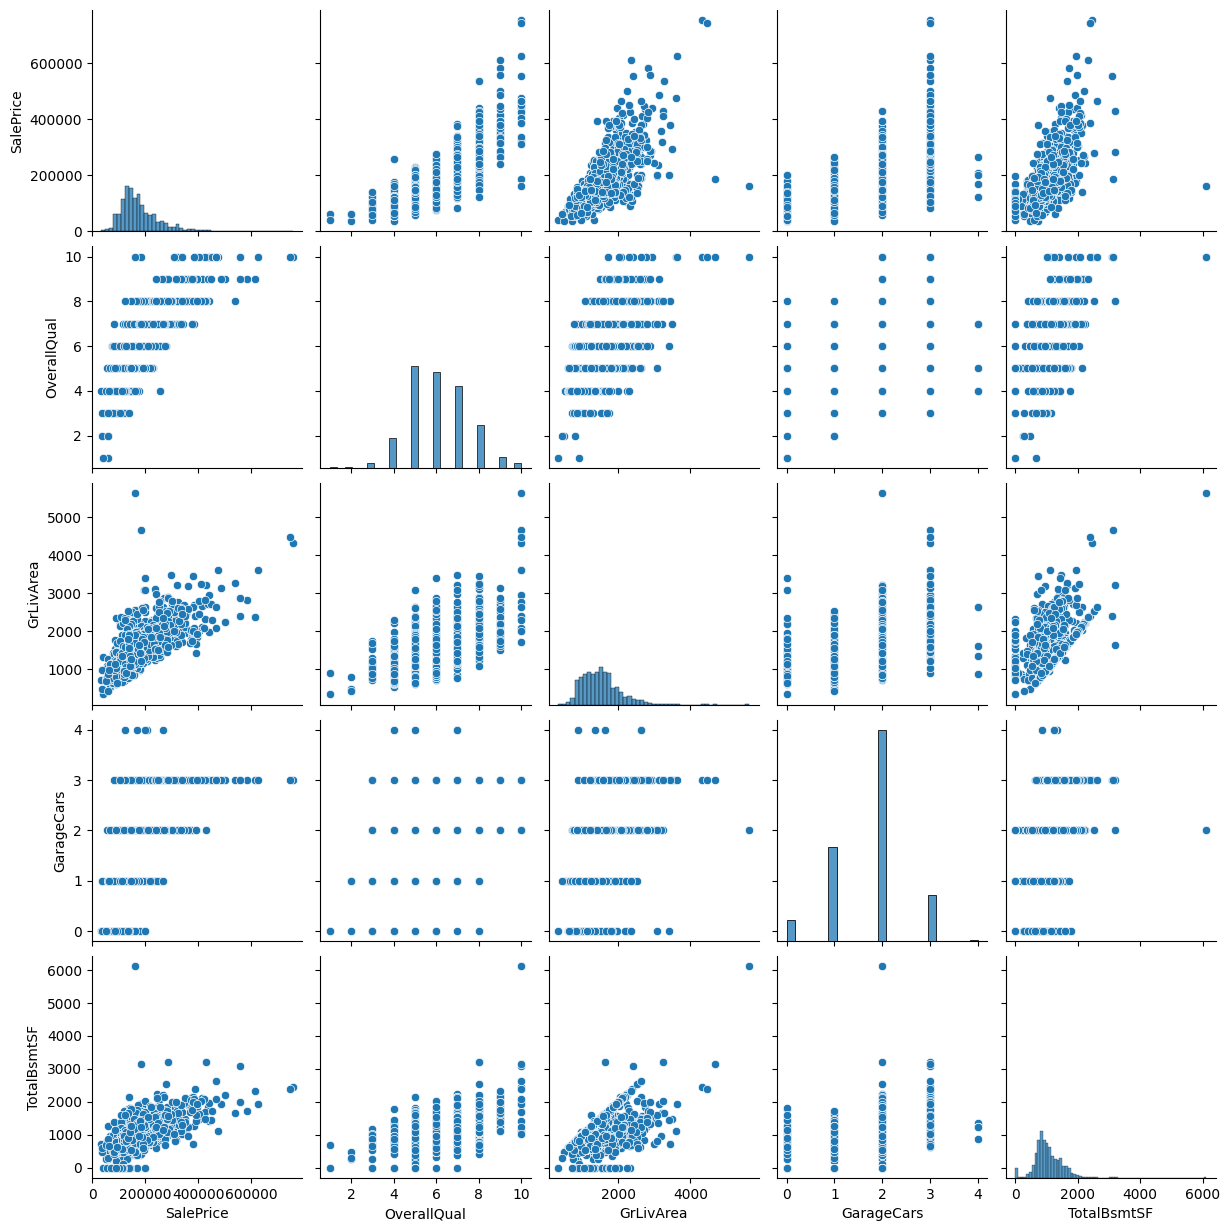

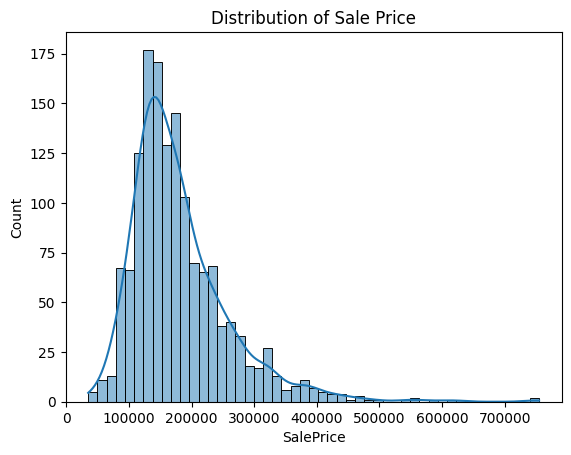

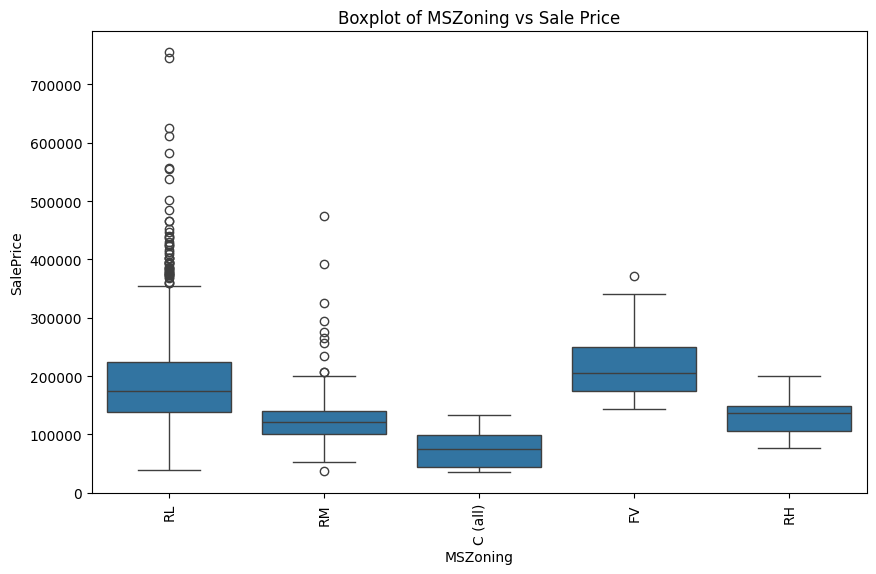

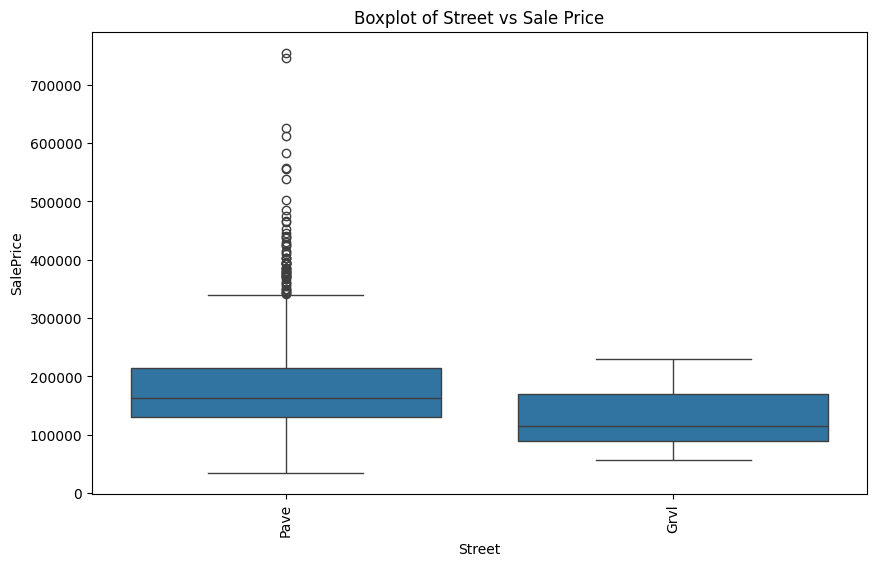

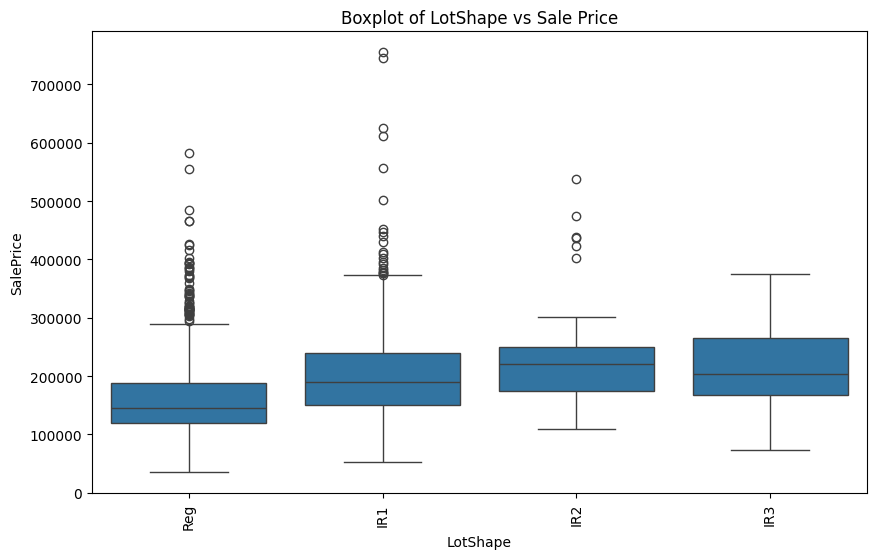

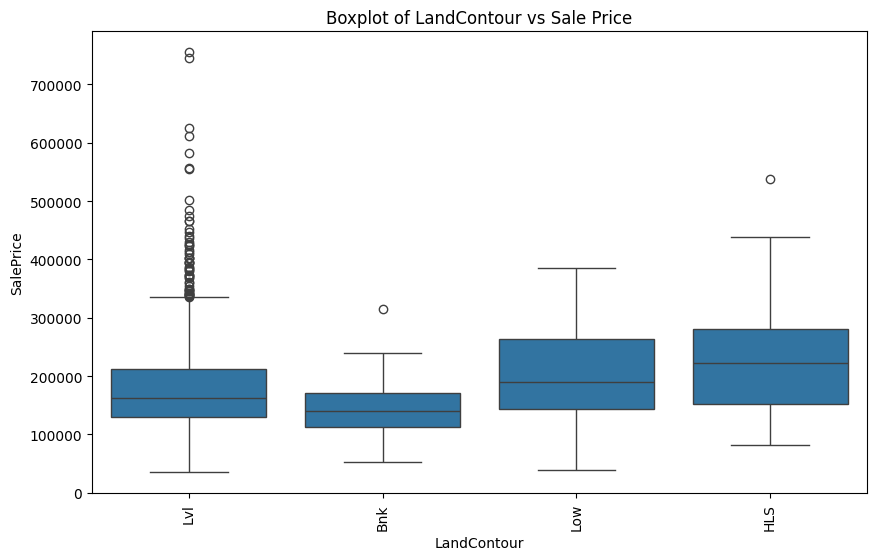

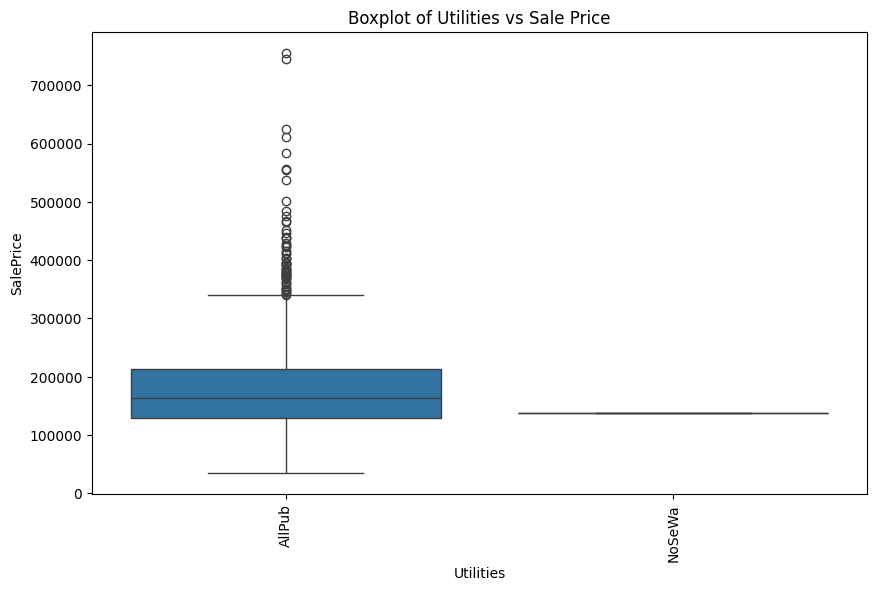

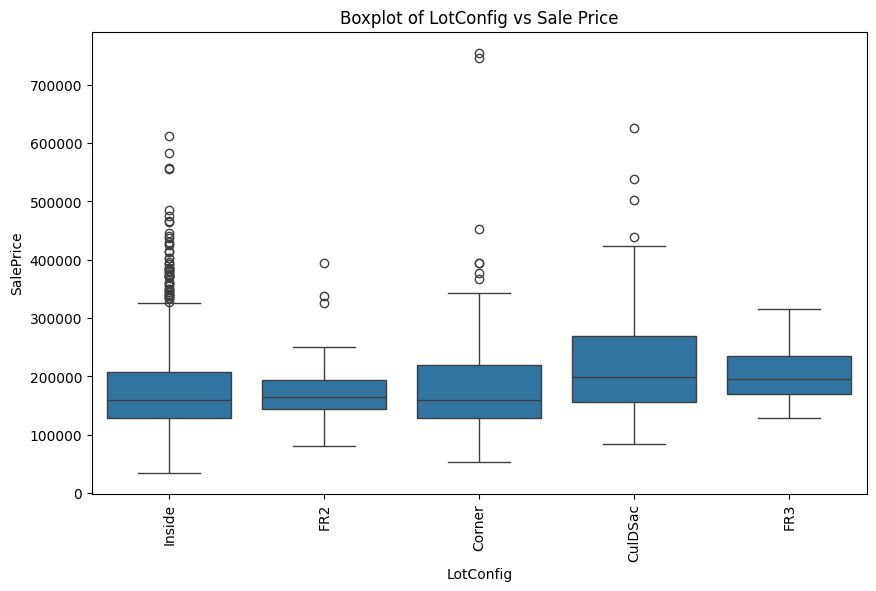

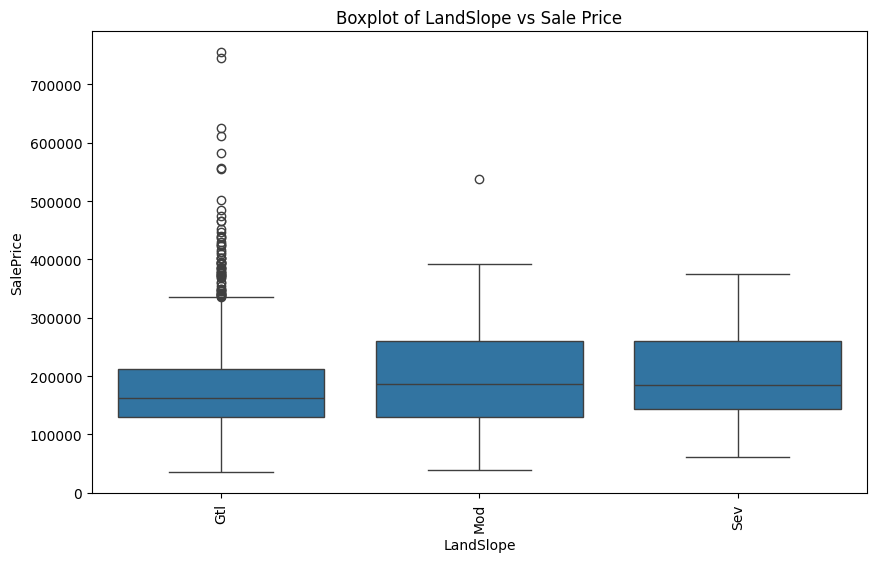

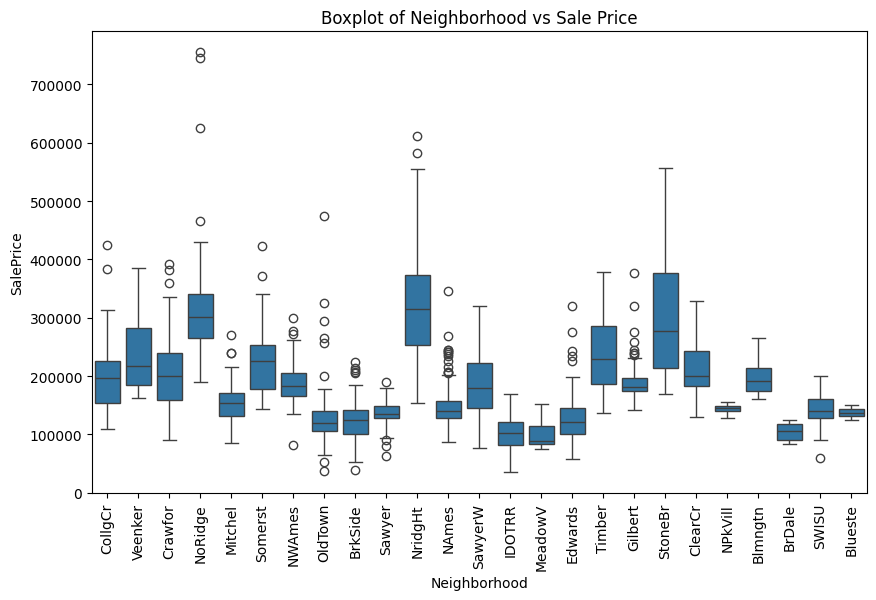

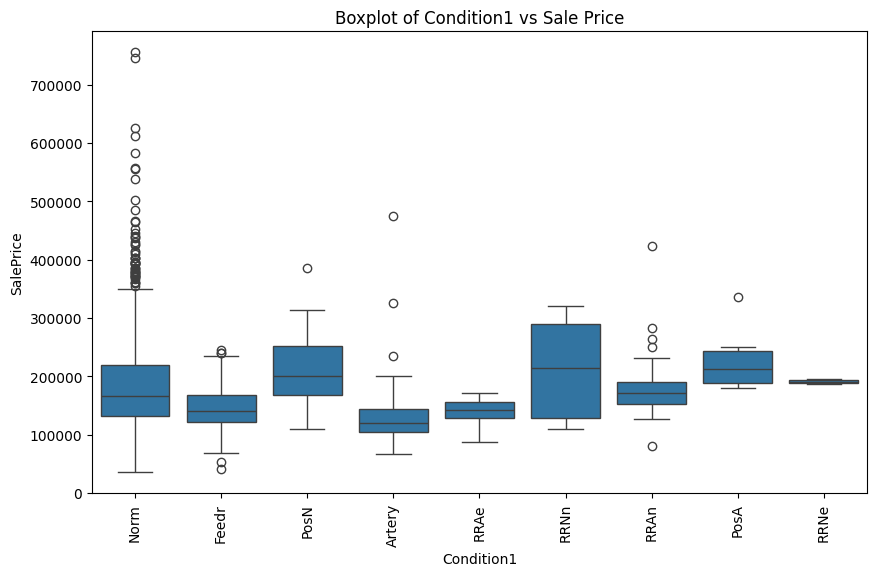

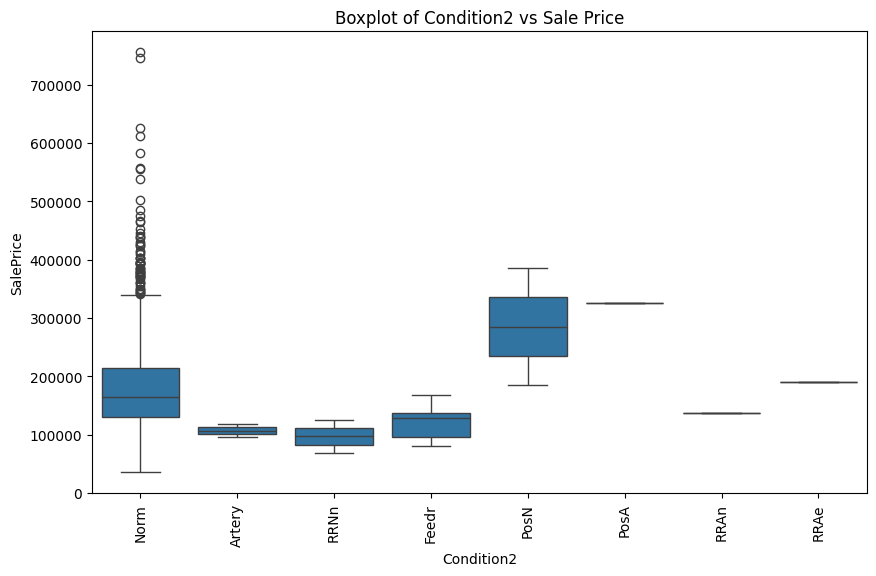

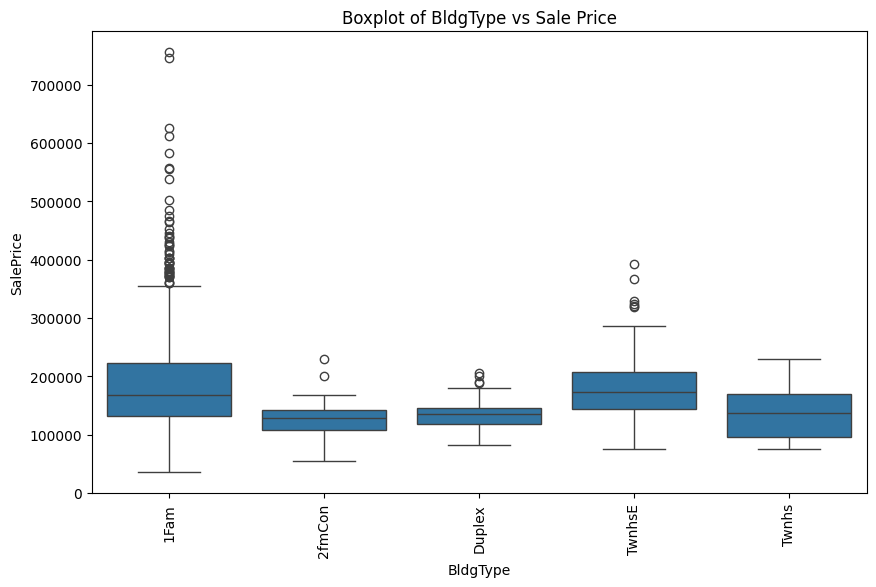

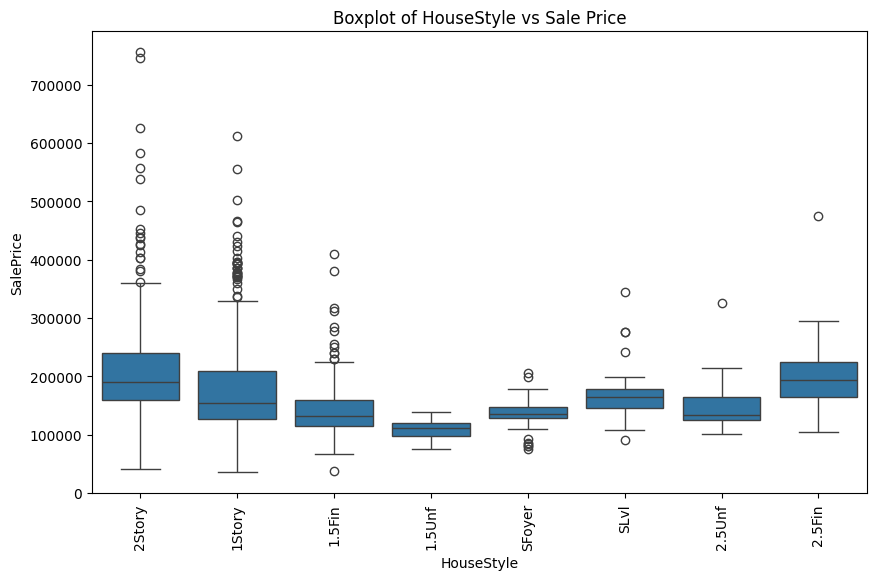

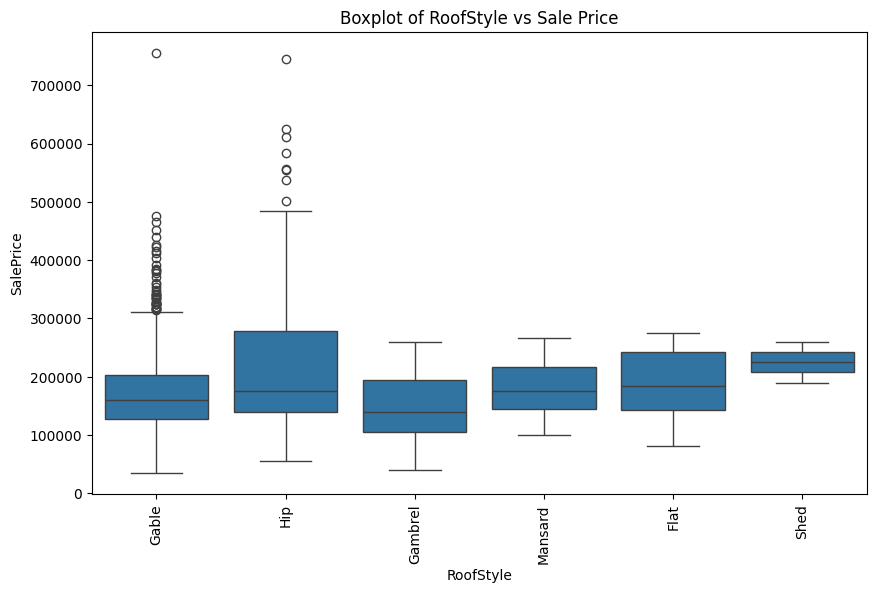

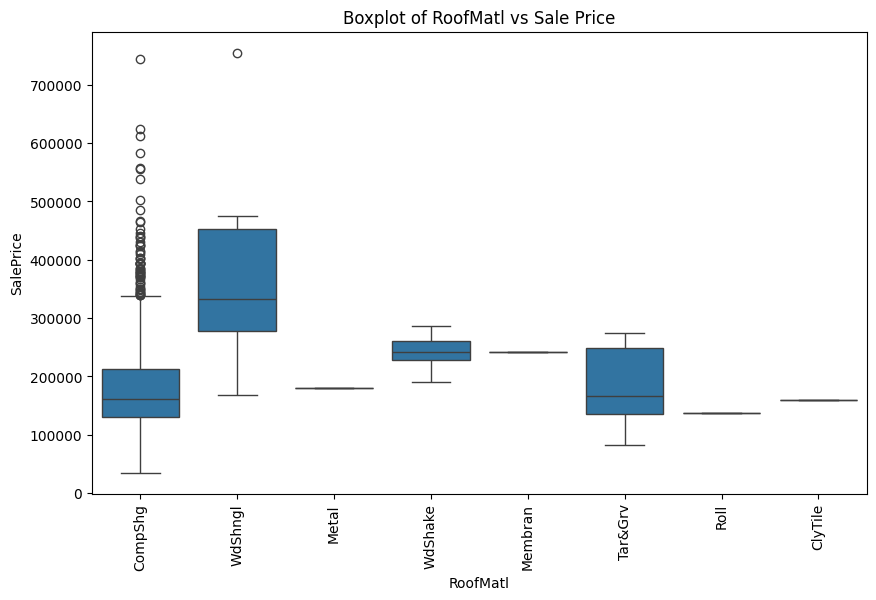

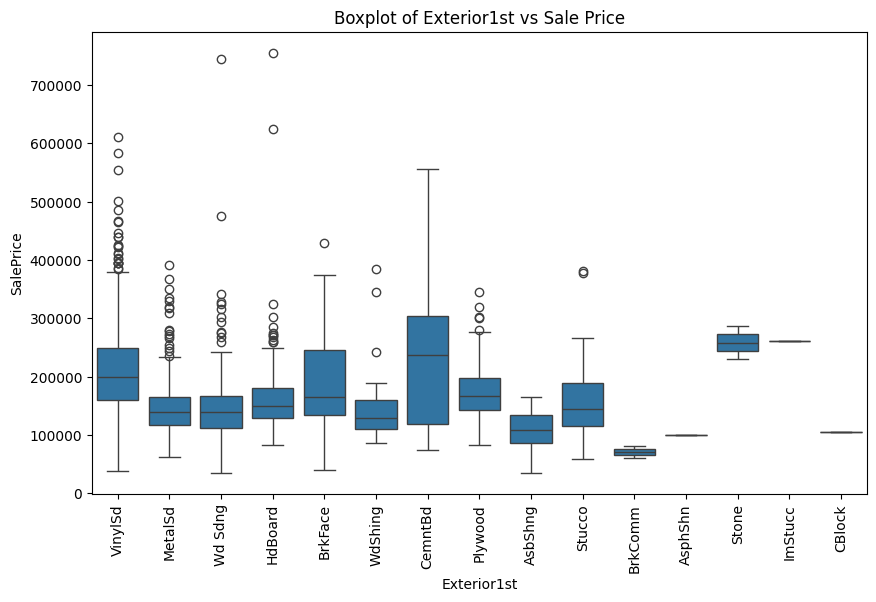

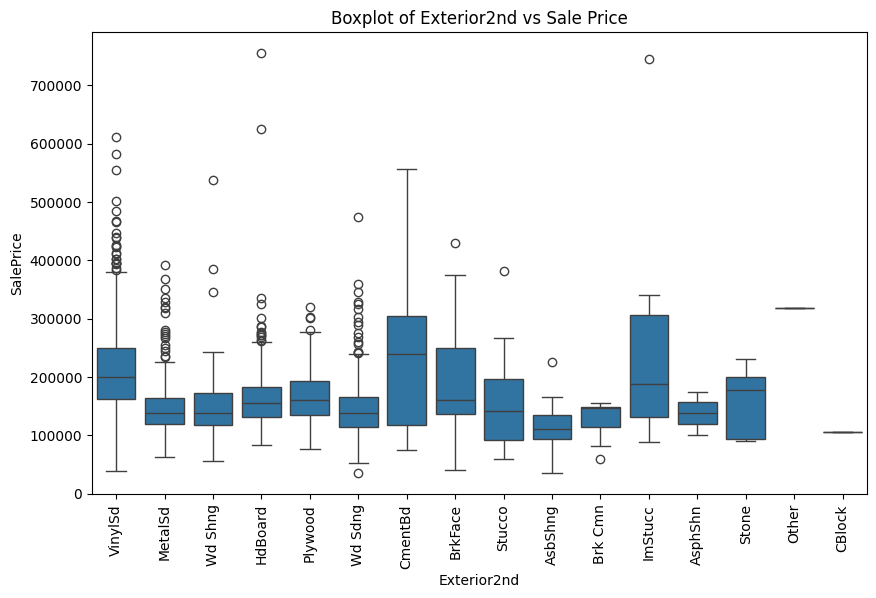

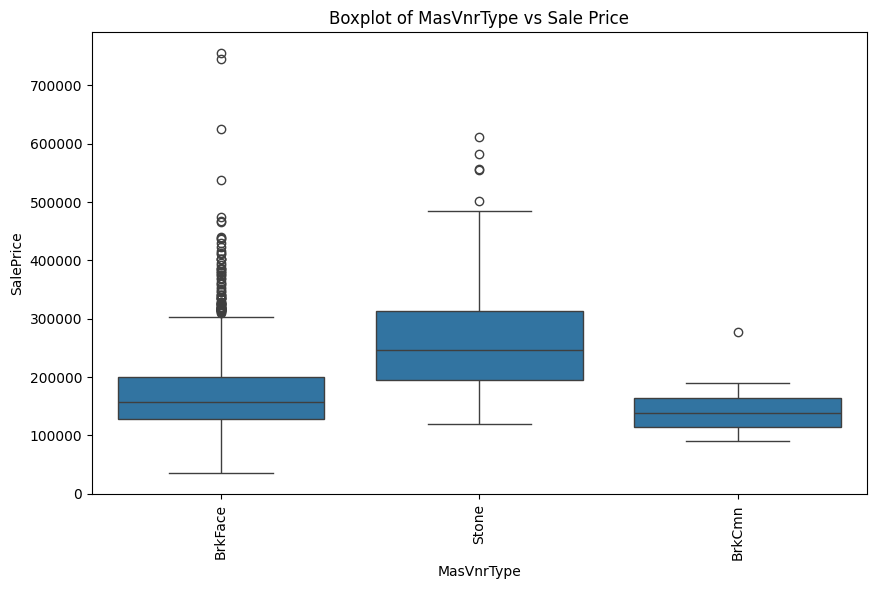

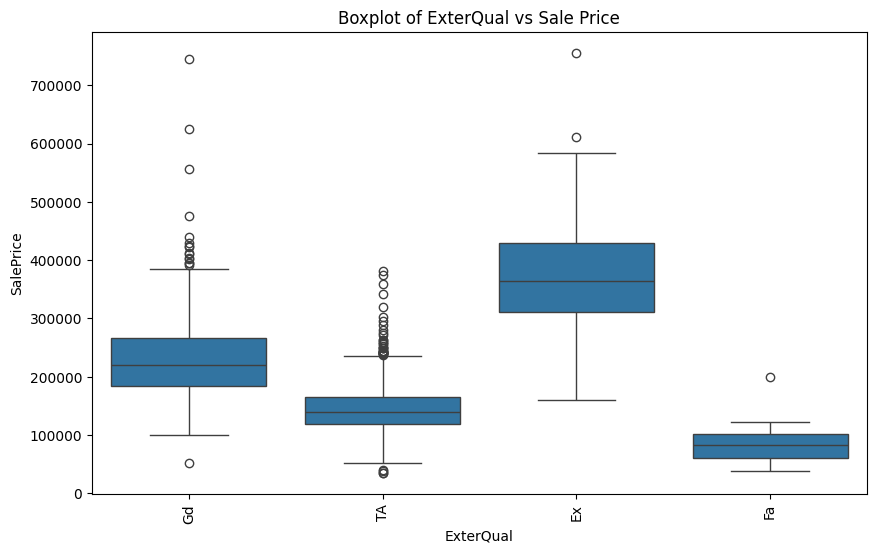

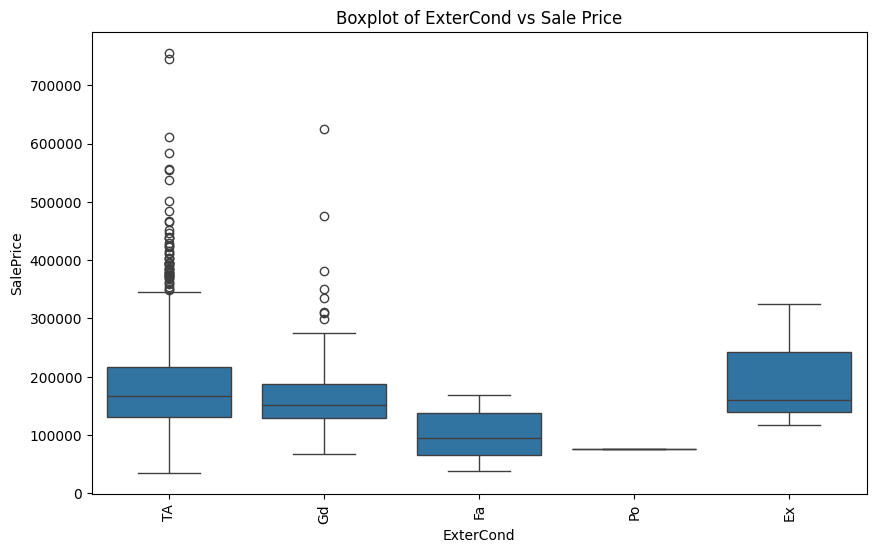

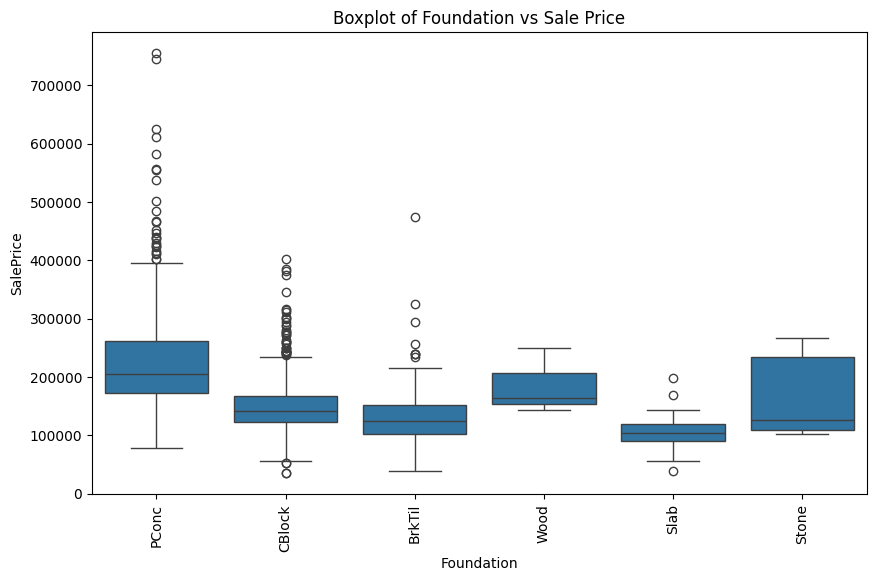

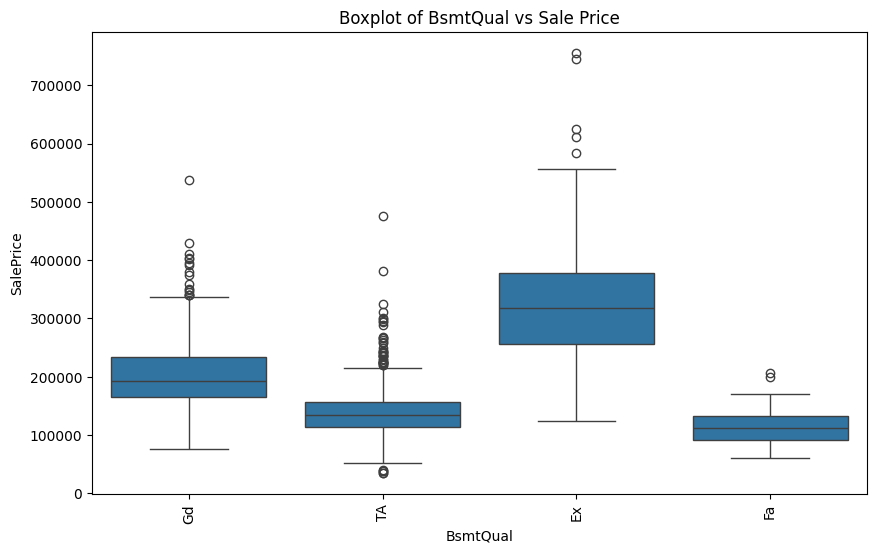

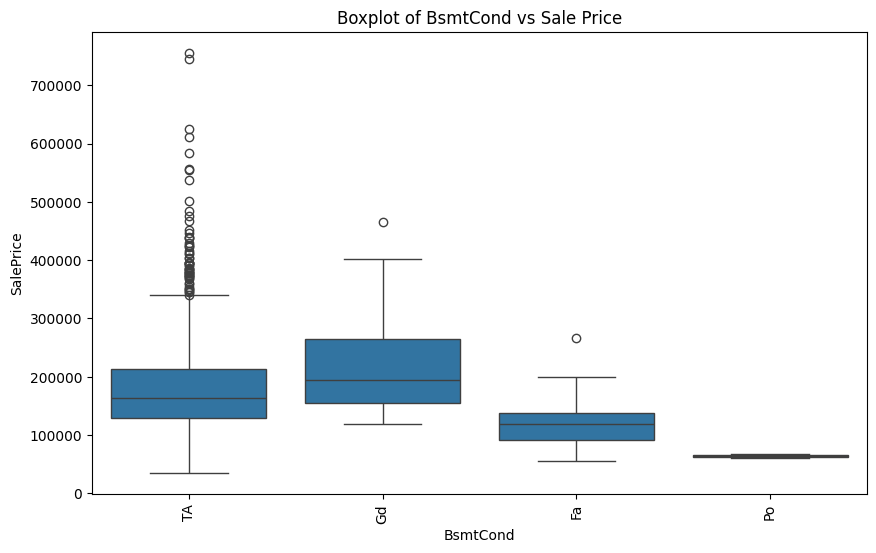

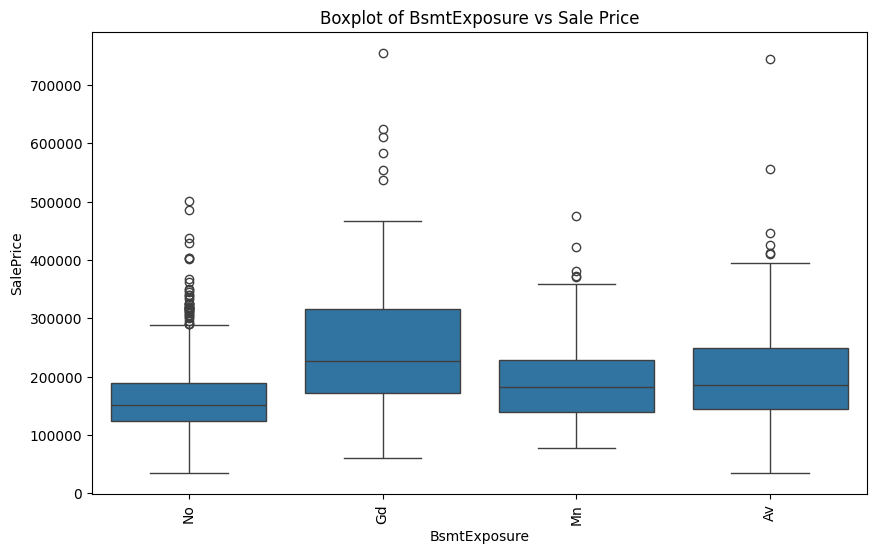

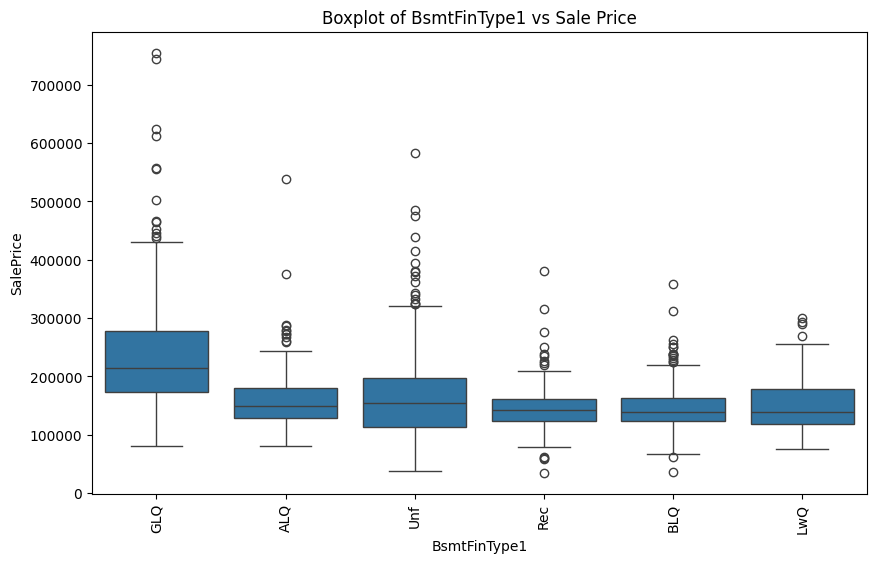

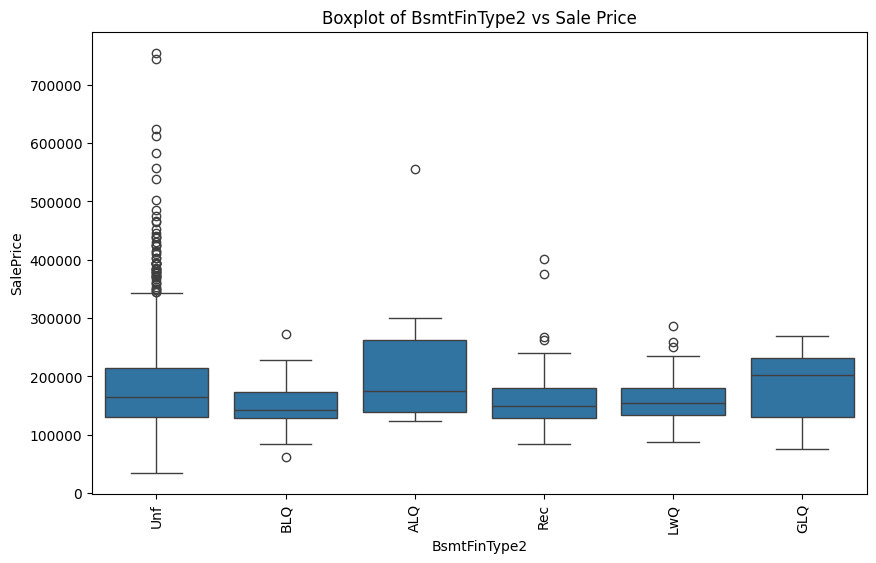

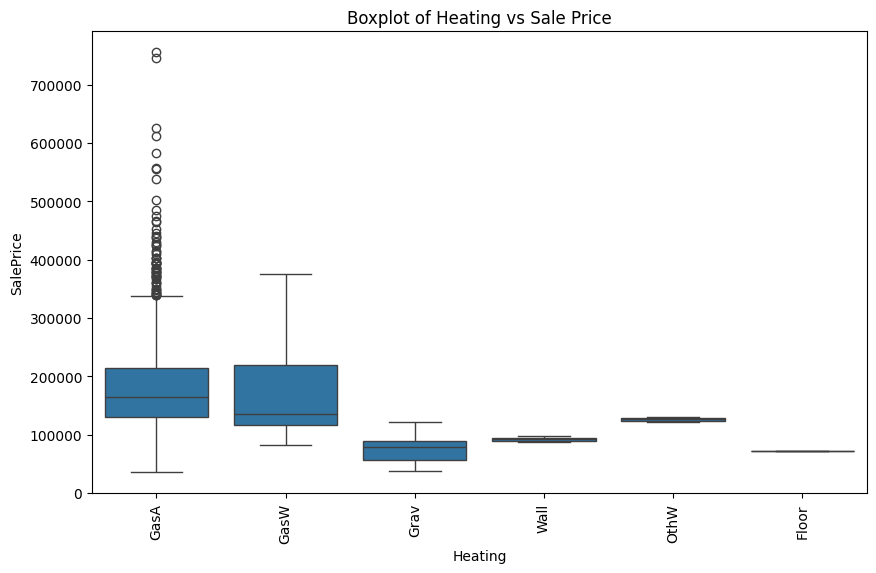

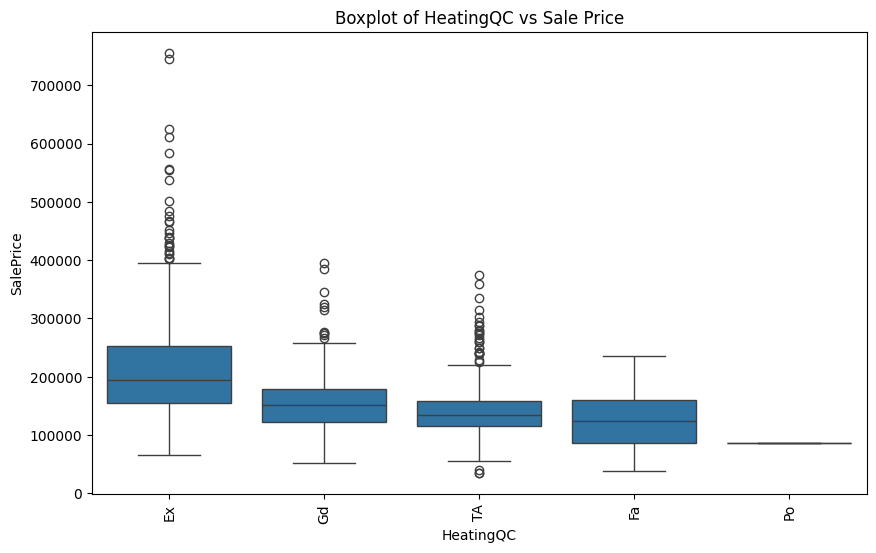

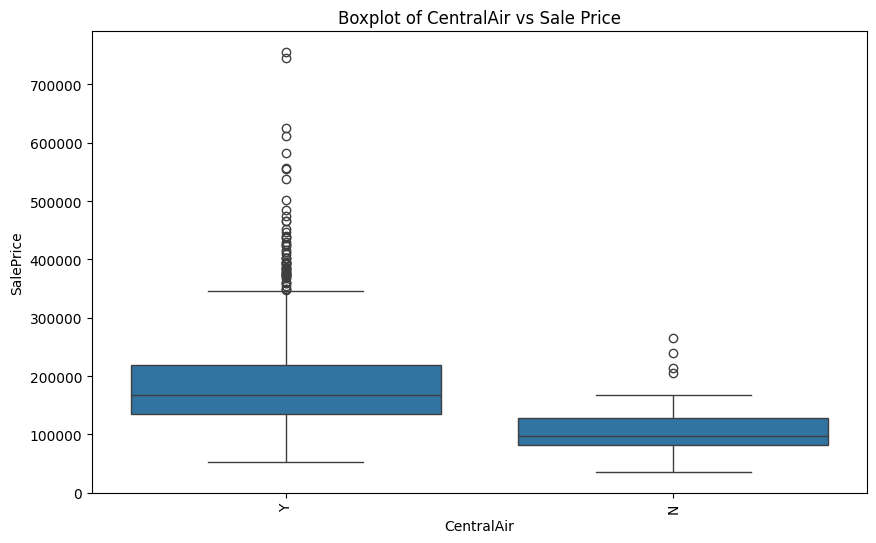

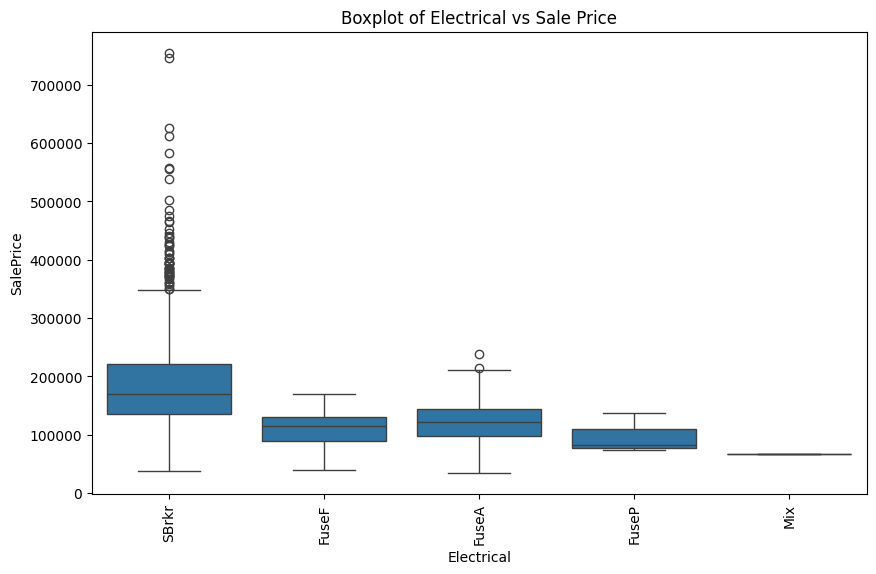

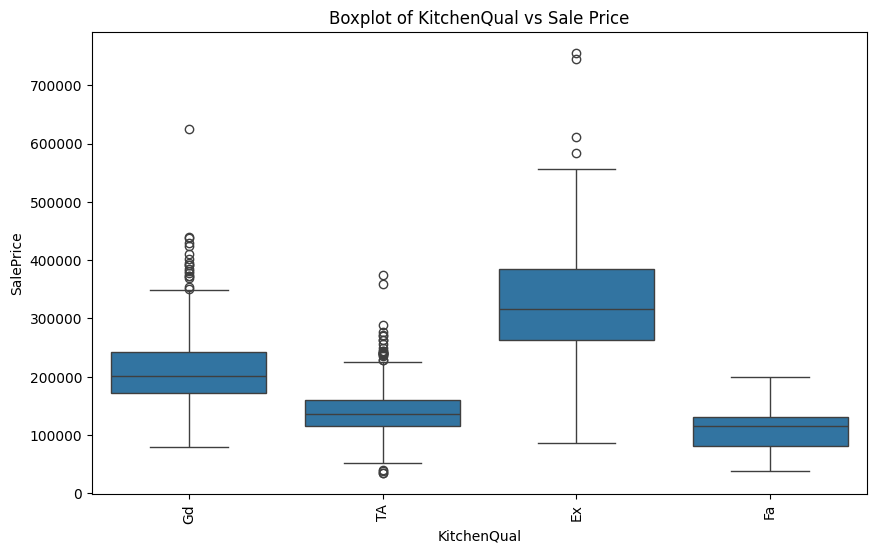

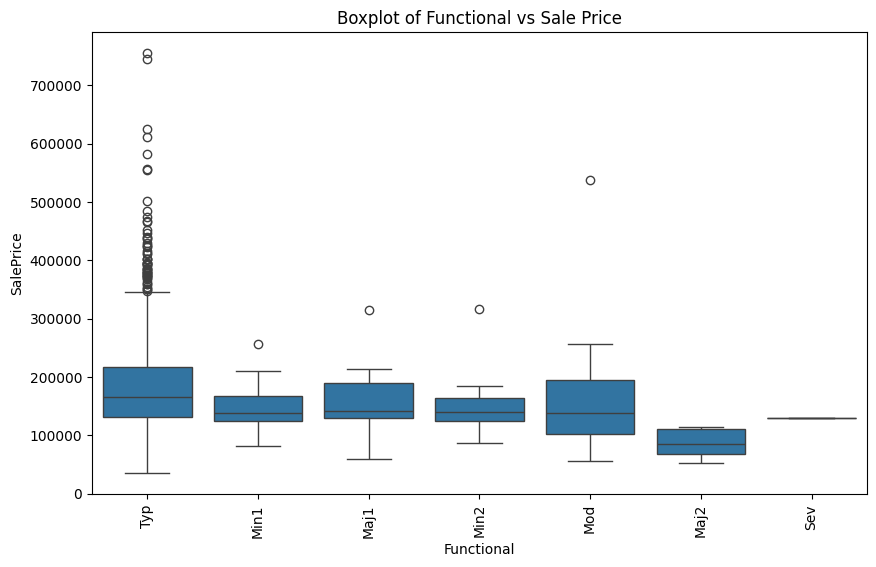

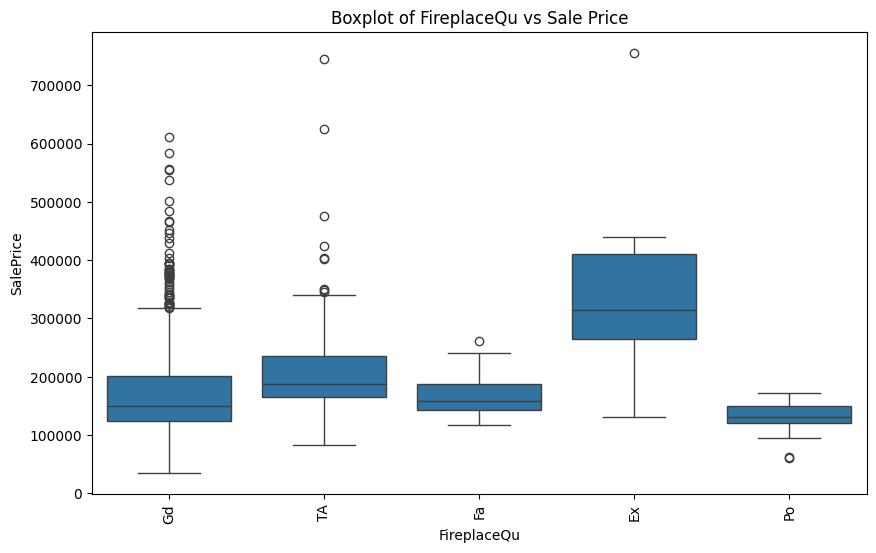

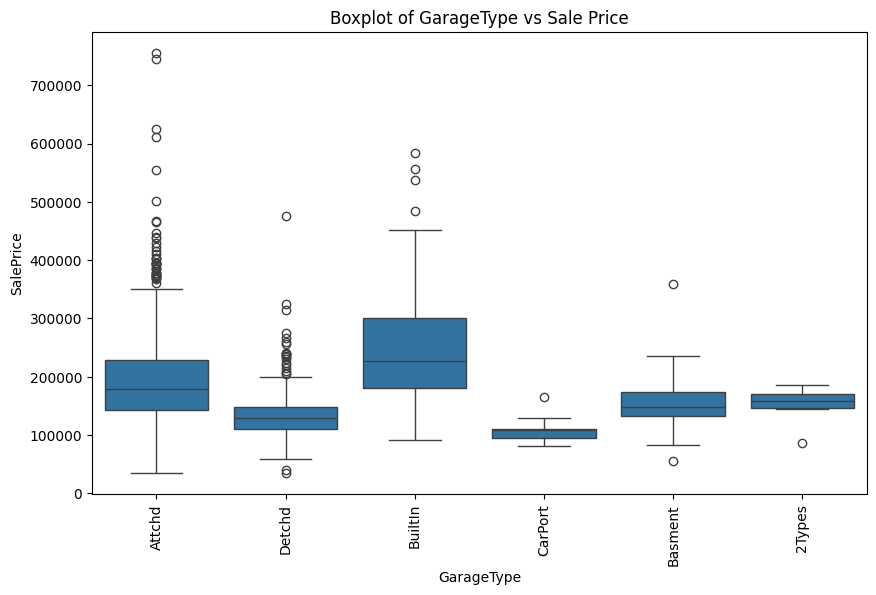

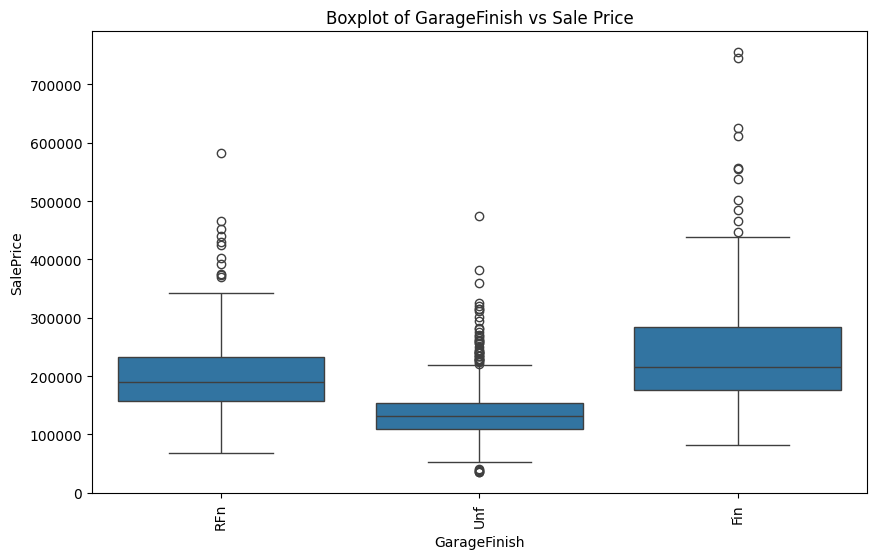

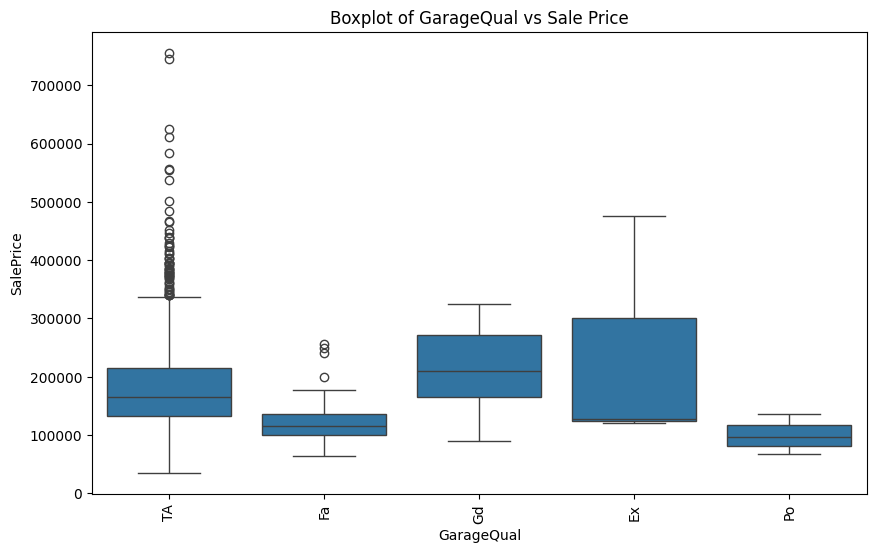

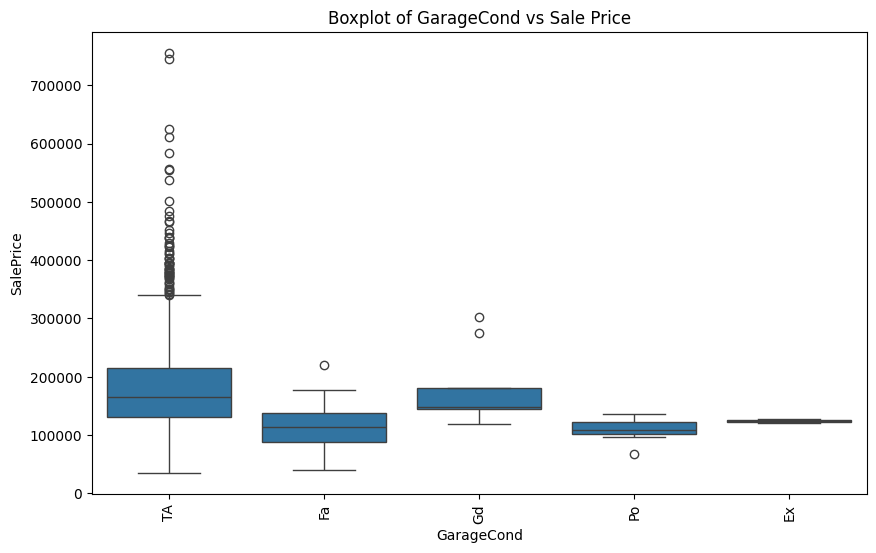

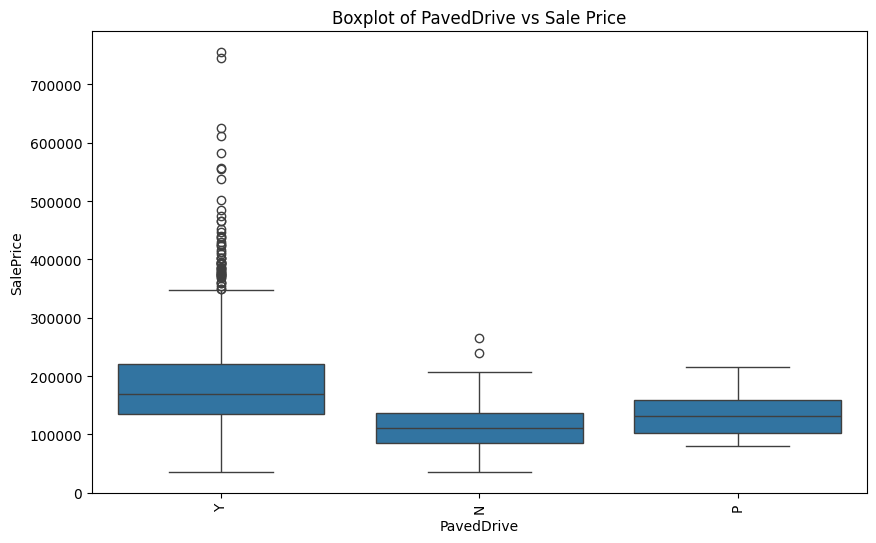

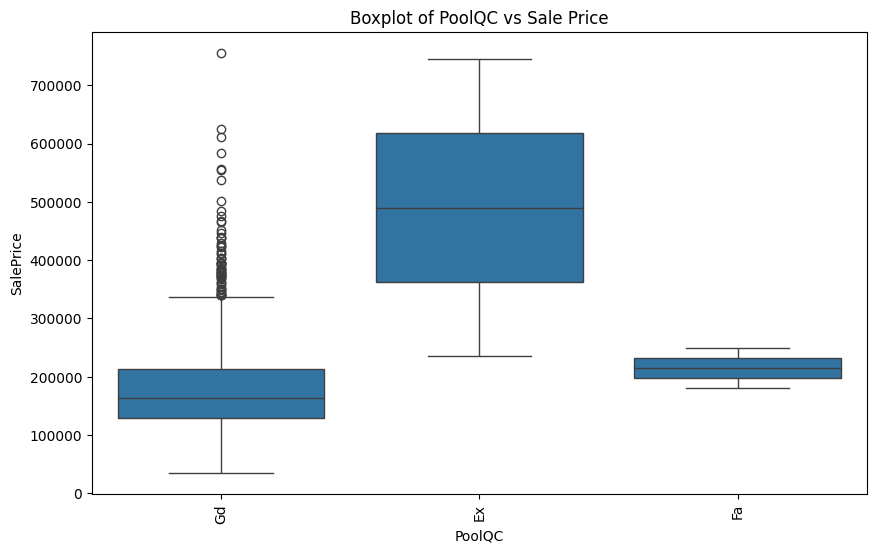

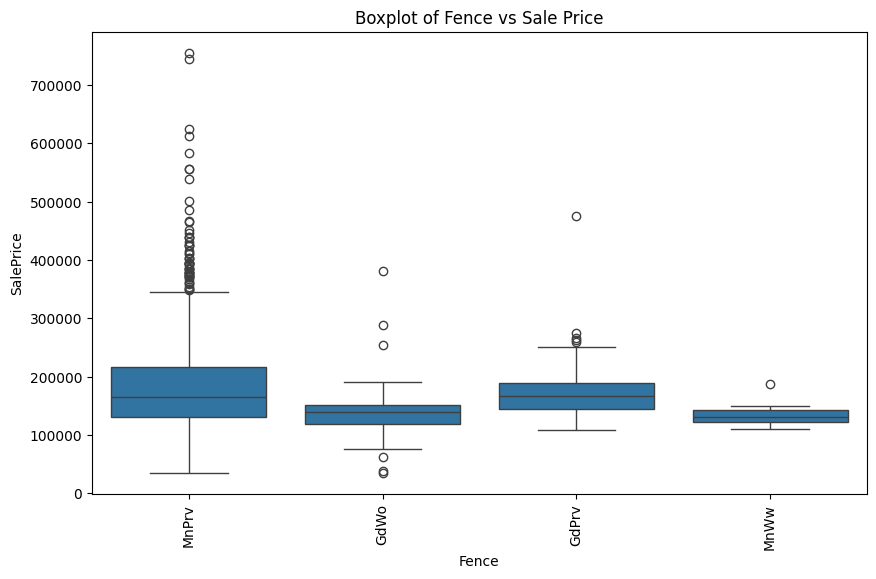

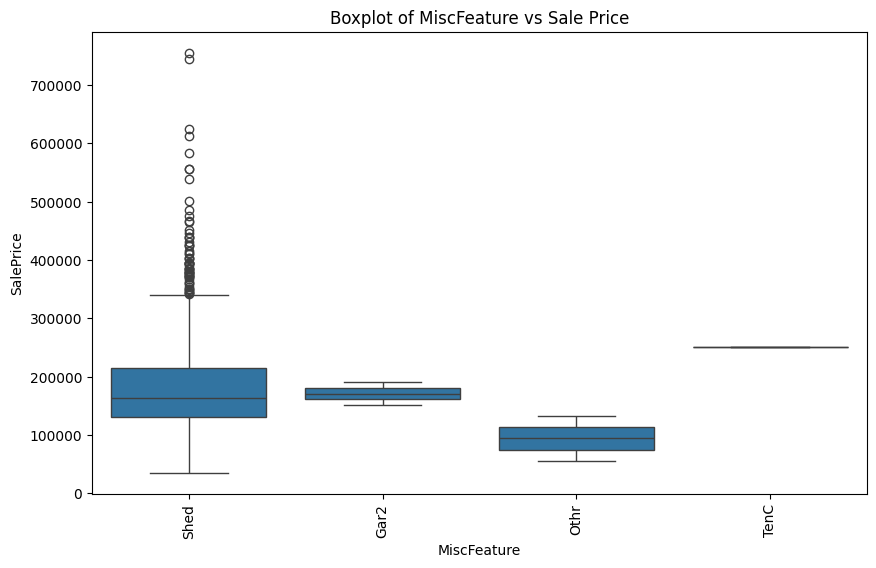

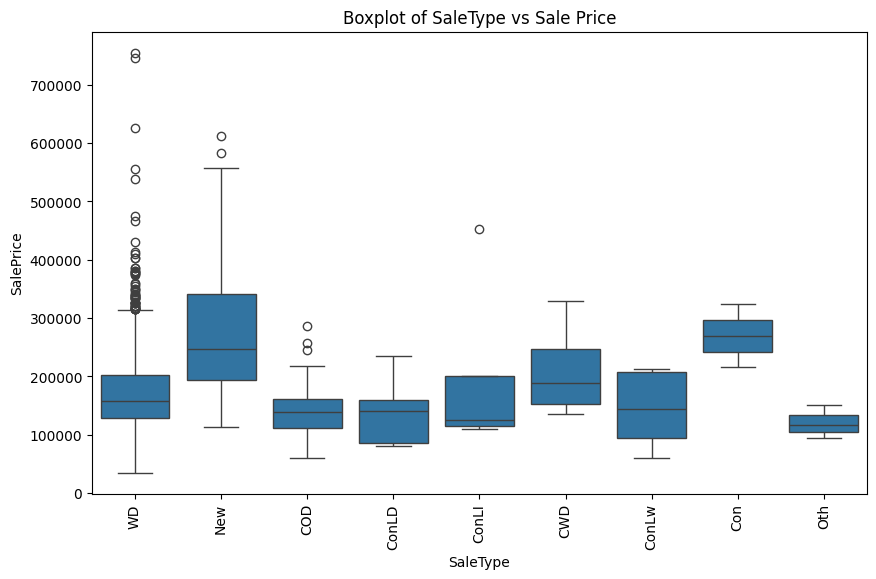

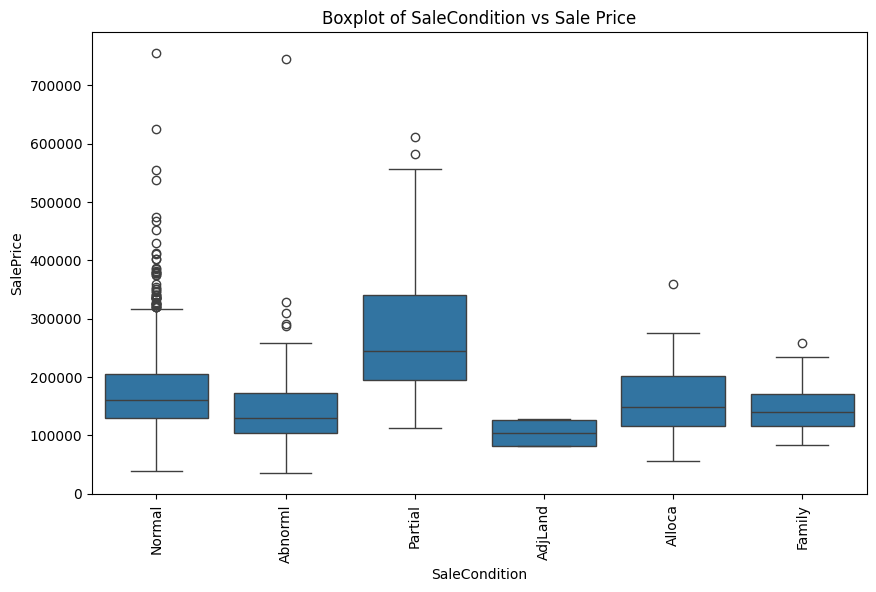

In [ ]:
# Correlation matrix for numerical features
# Select only numerical columns to calculate the correlation matrix
numeric_cols_for_corr = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols_for_corr].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for top correlated features with 'SalePrice'
# Assuming 'SalePrice' is a numerical column and is one of the most important features
top_correlated_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df[top_correlated_features])
plt.show()

# Distribution of 'SalePrice'
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

# Boxplot for categorical features against 'SalePrice'
categorical_features = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
    'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# Plot boxplots for categorical features against 'SalePrice'
for col in categorical_features:
    if col in df.columns:  # Check if the column exists in the DataFrame
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='SalePrice', data=df)
        plt.xticks(rotation=90)
        plt.title(f'Boxplot of {col} vs Sale Price')
        plt.show()

**Models**

Feature Engineering

In [ ]:
# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Split features and target variable
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. Linear Regression

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}, MAE: {mae_lr}')

Linear Regression - MSE: 6.472511659853532e+17, R2: -84383785.10011089, MAE: 47107470.9876325


2. Ridge Regression

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}, MAE: {mae_ridge}')

Ridge Regression - MSE: 2292242165.0390716, R2: 0.7011545398302315, MAE: 19878.62495773824


3. Lasso Regression

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}, MAE: {mae_lasso}')

Lasso Regression - MSE: 2635779910.81864, R2: 0.6563666473077894, MAE: 20223.393010008316


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.861e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


**Results and Analysis**

I have implemented three different linear regression models: Linear Regression, Ridge Regression, and Lasso Regression. The models were trained on the standardized dataset and evaluated on the test set using Mean Squared Error (MSE), R^2 Score, and Mean Absolute Error (MAE).

The Linear Regression model's performance is poor, indicated by the extremely high MSE and negative R² score. The MSE value is extremely large, suggesting that the model's predictions are far from the actual values. The negative R² score indicates that the model performs worse than a baseline model that simply predicts the mean of the target variable. The MAE is also very high, further confirming the poor performance of the Linear Regression model.

The Ridge Regression model performs significantly better than the Linear Regression model. The MSE is much lower, indicating that the predictions are closer to the actual values. The R² score of 0.701 indicates that the model explains about 70% of the variability in the target variable. This is a relatively good performance, although there is still room for improvement. The MAE is also lower compared to the Linear Regression model, further confirming the improved performance.

The Lasso Regression model's performance is slightly worse than the Ridge Regression model. The MSE is higher, indicating that the predictions are slightly less accurate. The R² score of 0.656 indicates that the model explains about 65% of the variability in the target variable, which is lower than the Ridge Regression model. The MAE is also slightly higher compared to the Ridge Regression model.

Conclusion

The Ridge Regression model performs the best among the three models. It has the lowest MSE, the highest R² score, and the lowest MAE. The Linear Regression model performs poorly, likely due to overfitting or inappropriate feature scaling. The Lasso Regression model, while similar to Ridge Regression, performs slightly worse, possibly due to its tendency to set some feature coefficients to zero, which may have resulted in losing important information for prediction.

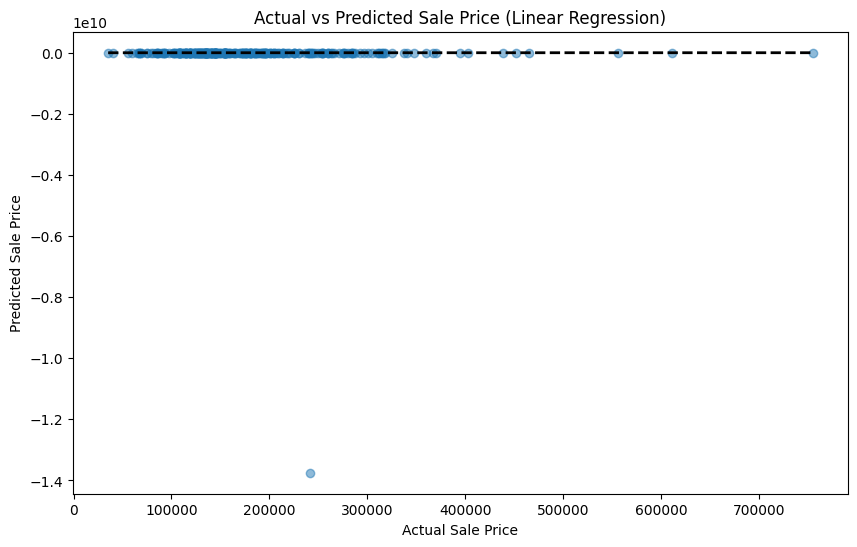

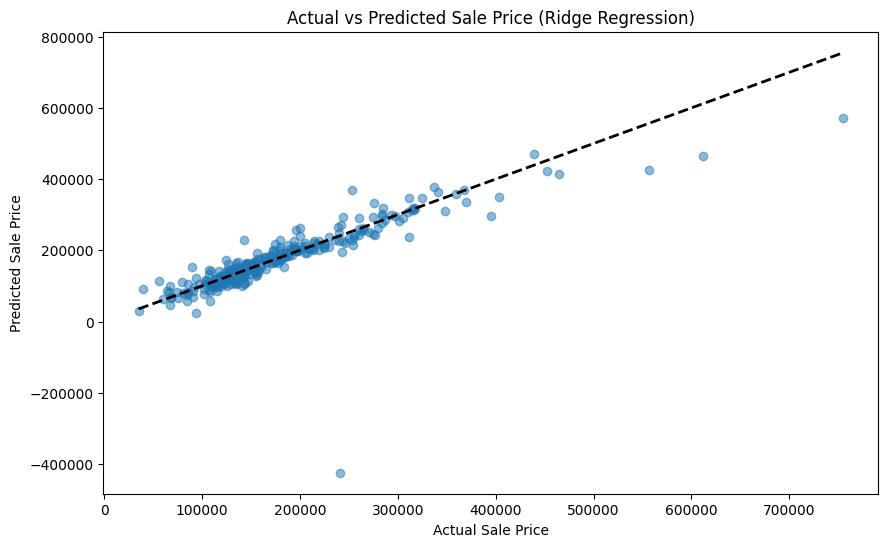

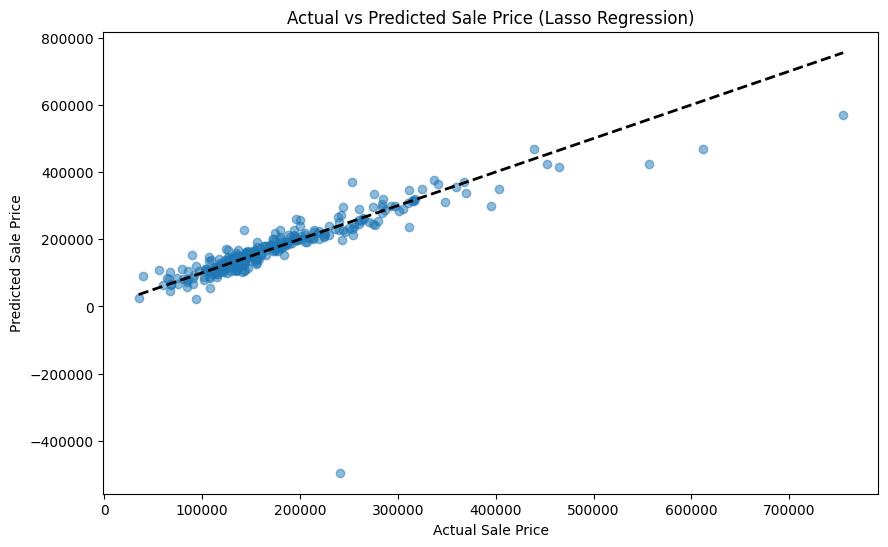

In [ ]:
# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Linear Regression)')
plt.show()


# Plot actual vs predicted for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Ridge Regression)')
plt.show()

# Plot actual vs predicted for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price (Lasso Regression)')
plt.show()

**Comparison of Models**

In [ ]:
# Model comparison table
models = {
    'Linear Regression': {'MSE': mse_lr, 'R2': r2_lr, 'MAE': mae_lr},
    'Ridge Regression': {'MSE': mse_ridge, 'R2': r2_ridge, 'MAE': mae_ridge},
    'Lasso Regression': {'MSE': mse_lasso, 'R2': r2_lasso, 'MAE': mae_lasso}
}

results_df = pd.DataFrame(models).T
print(results_df)

                            MSE            R2           MAE
Linear Regression  6.472512e+17 -8.438379e+07  4.710747e+07
Ridge Regression   2.292242e+09  7.011545e-01  1.987862e+04
Lasso Regression   2.635780e+09  6.563666e-01  2.022339e+04


**Conclusion**

By implementing and comparing different linear regression models and using evaluation metrics, we can understand which model performs best on the given dataset. Further improvements can be made by tuning hyperparameters and using cross-validation to ensure the robustness of the models. The visualizations help in interpreting the data and understanding the relationships between features and the target variable.